You are predicting protein organelle localization labels for each sample. There are in total 28 different labels present in the dataset. The dataset is acquired in a highly standardized way using one imaging modality (confocal microscopy). However, the dataset comprises 27 different cell types of highly different morphology, which affect the protein patterns of the different organelles. All image samples are represented by four filters (stored as individual files), the protein of interest (green) plus three cellular landmarks: nucleus (blue), microtubules (red), endoplasmic reticulum (yellow). The green filter should hence be used to predict the label, and the other filters are used as references.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# List, dictionaries of class number and labels.

label_dict = {0: 'Nucleoplasm', 1: 'Nuclear membrane', 2: 'Nucleoli', 3: 'Nucleoli fibrillar center', 4: 'Nuclear speckles', 5: 'Nuclear bodies', 6: 'Endoplasmic reticulum',
         7: 'Golgi apparatus', 8: 'Peroxisomes', 9: 'Endosomes', 10: 'Lysosomes', 11: 'Intermediate filaments', 12: 'Actin filaments', 13: 'Focal adhesion sites', 
         14: 'Microtubules', 15: 'Microtubule ends', 16: 'Cytokinetic bridge', 17: 'Mitotic spindle', 18: 'Microtubule organizing center', 19: 'Centrosome', 20: 'Lipid droplets',
         21: 'Plasma membrane', 22: 'Cell junctions', 23: 'Mitochondria', 24: 'Aggresome', 25: 'Cytosol', 26: 'Cytoplasmic bodies', 27: 'Rods & rings'}

label_list = ['Nucleoplasm', 'Nuclear membrane', 'Nucleoli', 'Nucleoli fibrillar center', 'Nuclear speckles', 'Nuclear bodies', 'Endoplasmic reticulum', 
              'Golgi apparatus', 'Peroxisomes', 'Endosomes', 'Lysosomes', 'Intermediate filaments', 'Actin filaments', 'Focal adhesion sites', 
              'Microtubules', 'Microtubule ends', 'Cytokinetic bridge', 'Mitotic spindle', 'Microtubule organizing center', 'Centrosome', 'Lipid droplets', 
              'Plasma membrane', 'Cell junctions', 'Mitochondria', 'Aggresome', 'Cytosol', 'Cytoplasmic bodies', 'Rods & rings']

map_label_number = {'Nucleoplasm': 0, 'Nuclear membrane': 1, 'Nucleoli': 2, 'Nucleoli fibrillar center': 3, 'Nuclear speckles': 4, 'Nuclear bodies': 5, 'Endoplasmic reticulum': 6, 
                    'Golgi apparatus': 7, 'Peroxisomes': 8, 'Endosomes': 9, 'Lysosomes': 10, 'Intermediate filaments': 11, 'Actin filaments': 12, 'Focal adhesion sites': 13, 
                    'Microtubules': 14, 'Microtubule ends': 15, 'Cytokinetic bridge': 16, 'Mitotic spindle': 17, 'Microtubule organizing center': 18, 'Centrosome': 19, 'Lipid droplets': 20, 
                    'Plasma membrane': 21, 'Cell junctions': 22, 'Mitochondria': 23, 'Aggresome': 24, 'Cytosol': 25, 'Cytoplasmic bodies': 26, 'Rods & rings': 27}

In [3]:
# Set the path to train set

path_to_train = './train/'

In [4]:
# Import Ids of images and labels into a dataframe and add columns for readability

ground_truth = pd.read_csv('train.csv')
ground_truth['List Target'] = ground_truth['Target'].apply(lambda string: sorted(list(map(int, string.split(' ')))))
ground_truth['Label Target'] =  ground_truth['List Target'].apply(lambda lis: [label_list[idx] for idx in lis])
ground_truth['Label'] =  ground_truth['Label Target'].apply(lambda lis: ', '.join(lis))
ground_truth['Path'] = path_to_train + ground_truth['Id']
ground_truth

,Id,Target,List Target,Label Target,Label,Path
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0,"[0, 16]","[Nucleoplasm, Cytokinetic bridge]","Nucleoplasm, Cytokinetic bridge",./train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0,"[0, 1, 2, 7]","[Nucleoplasm, Nuclear membrane, Nucleoli, Golg...","Nucleoplasm, Nuclear membrane, Nucleoli, Golgi...",./train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5,[5],[Nuclear bodies],Nuclear bodies,./train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1,[1],[Nuclear membrane],Nuclear membrane,./train/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18,[18],[Microtubule organizing center],Microtubule organizing center,./train/001838f8-bbca-11e8-b2bc-ac1f6b6435d0
...,...,...,...,...,...,...
31067,ffed4430-bbac-11e8-b2ba-ac1f6b6435d0,21,[21],[Plasma membrane],Plasma membrane,./train/ffed4430-bbac-11e8-b2ba-ac1f6b6435d0
31068,fff0a998-bbae-11e8-b2ba-ac1f6b6435d0,5,[5],[Nuclear bodies],Nuclear bodies,./train/fff0a998-bbae-11e8-b2ba-ac1f6b6435d0
31069,fff189d8-bbab-11e8-b2ba-ac1f6b6435d0,7,[7],[Golgi apparatus],Golgi apparatus,./train/fff189d8-bbab-11e8-b2ba-ac1f6b6435d0
31070,fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0,25 2 21,"[2, 21, 25]","[Nucleoli, Plasma membrane, Cytosol]","Nucleoli, Plasma membrane, Cytosol",./train/fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0


In [5]:
# Briefly check class frequency

all_label = pd.DataFrame(ground_truth['Label Target'].sum(), columns = ['Label']).copy()
frequency_table = all_label['Label'].value_counts().reset_index().copy().rename(columns = {'index': 'Label', 'Label': 'Frequency'})
frequency_table['Numeric Label'] = pd.DataFrame(frequency_table['Label']).replace({'Label': map_label_number}).copy()
frequency_table['Relative Frequency'] = frequency_table['Frequency'] / frequency_table['Frequency'].sum()
frequency_table['Relative Frequency %'] = (frequency_table['Frequency'] / frequency_table['Frequency'].sum()).apply(lambda number: '{:.2%}'.format(number))
frequency_table[['Numeric Label', 'Label', 'Frequency', 'Relative Frequency', 'Relative Frequency %']].set_index('Numeric Label')

,Label,Frequency,Relative Frequency,Relative Frequency %
Numeric Label,,,,
0,Nucleoplasm,12885,0.253732,25.37%
25,Cytosol,8228,0.162026,16.20%
21,Plasma membrane,3777,0.074377,7.44%
2,Nucleoli,3621,0.071305,7.13%
23,Mitochondria,2965,0.058387,5.84%
7,Golgi apparatus,2822,0.055571,5.56%
5,Nuclear bodies,2513,0.049486,4.95%
4,Nuclear speckles,1858,0.036588,3.66%
3,Nucleoli fibrillar center,1561,0.030739,3.07%


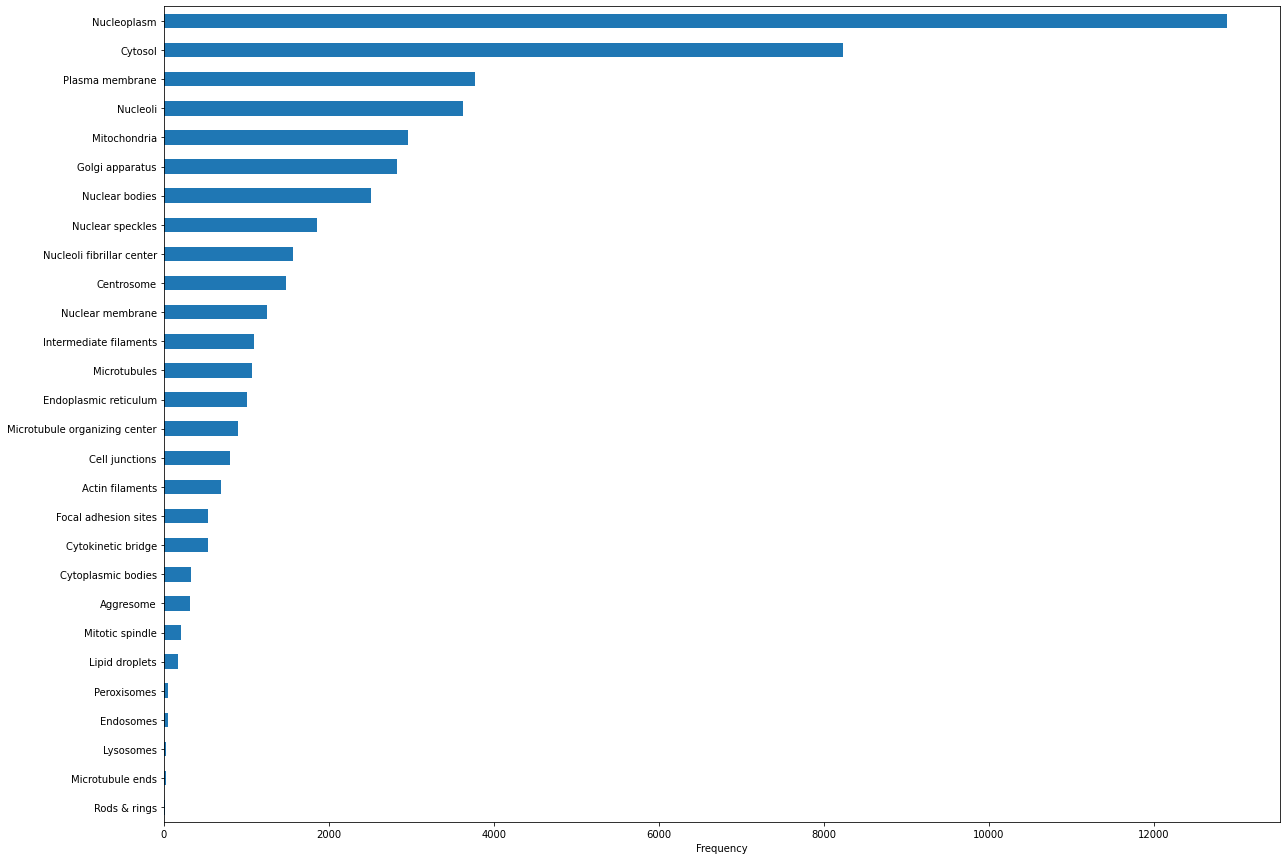

In [21]:
# Plot frequency

fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
plt.xlabel("Frequency")
all_label['Label'].value_counts().sort_values().plot(ax=ax, kind='barh')
plt.savefig('label_frequency.png', format = 'png')
Image.open('label_frequency.png').save('label_frequency.png','PNG')

In [26]:
def get_image(path):
    red = np.array(Image.open(path + '_red.png'))
    green = np.array(Image.open(path + '_green.png'))
    blue = np.array(Image.open(path + '_blue.png'))
    return np.stack((red, green, blue),-1)

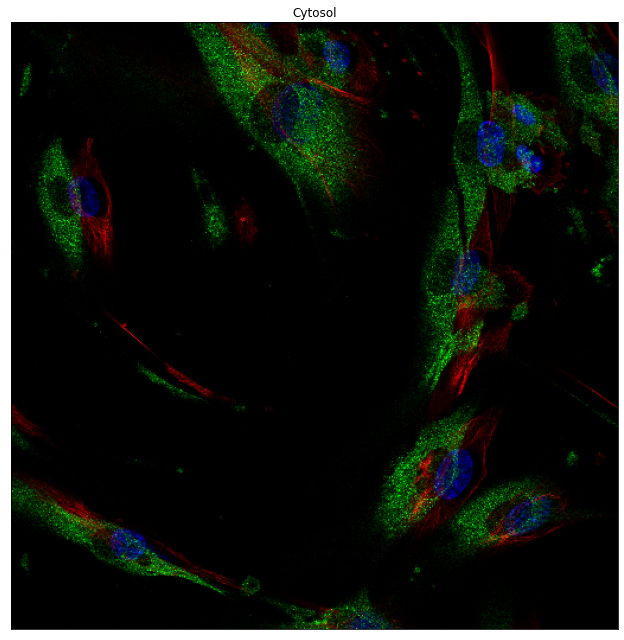

In [39]:
# PLOT SINGLE IMAGE
# Figura disallineata: 20948

fig, ax = plt.subplots()
fig.set_size_inches(15.5, 9.0)
idx = np.random.randint(0, ground_truth.shape[0])
idx = 20948 # figura disallineata
im = get_image(ground_truth.iloc[idx,:].Path)
ax.imshow(im)
ax.set_title(ground_truth.iloc[idx,:].Label)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()

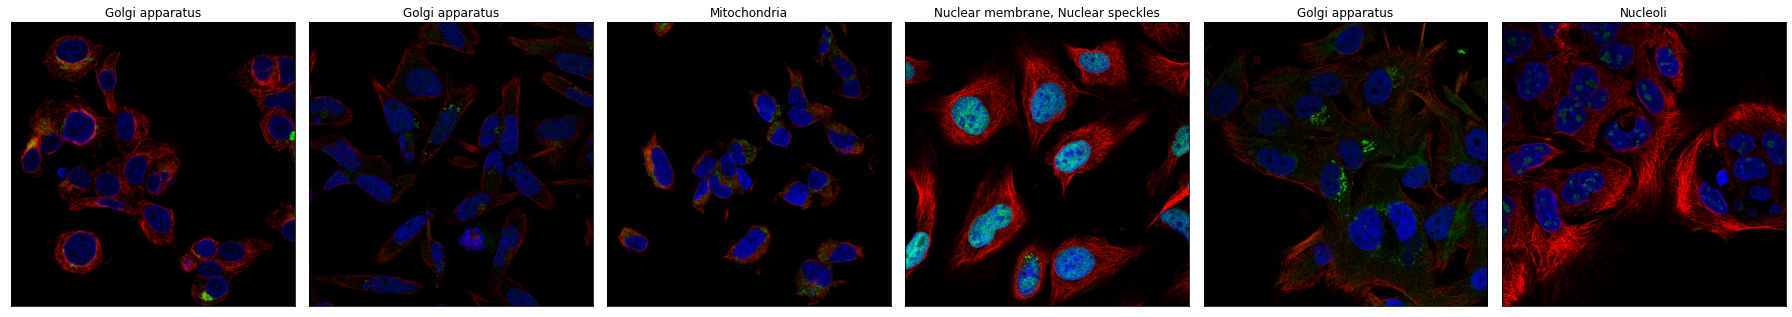

In [41]:
# PLOT MULTPLE RANDOM IMAGES

num_rows = 2
num_columns = 6
fig, axes = plt.subplots(ncols = num_columns, figsize=(25, 25))
#for i in range(num_rows):
for j in range(num_columns):
    idx = np.random.randint(0, ground_truth.shape[0])
    axes[j].imshow(get_image(ground_truth.iloc[idx,:].Path))
    axes[j].set_title(ground_truth.iloc[idx,:].Label)
    axes[j].set_xticks([])
    axes[j].set_yticks([])
fig.tight_layout()

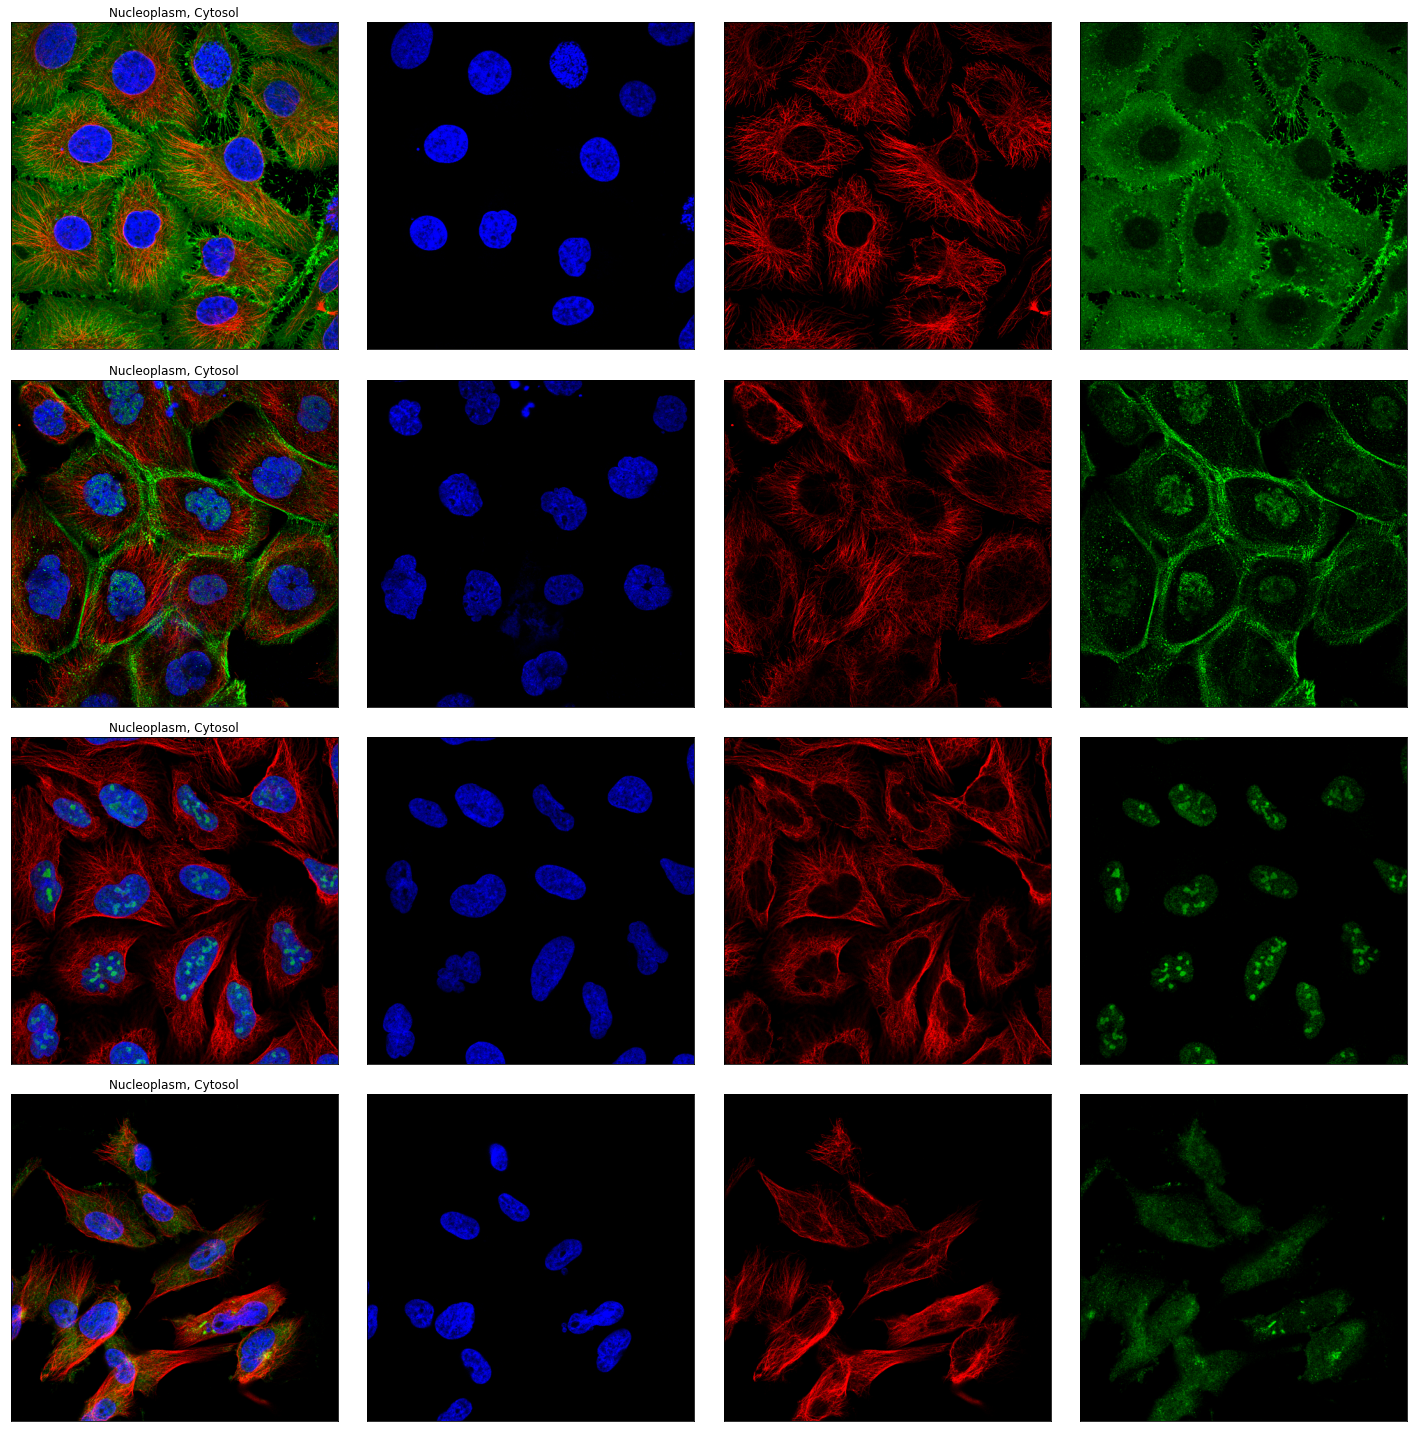

In [43]:
fix_img_list = [30004, 15709, 1014, 1967] # only 30004 and 15709 for slides
num_rows = len(fix_img_list)
num_columns = 4
fig, axes = plt.subplots(nrows = num_rows, ncols = num_columns, figsize = (20, 20))
empty = np.zeros((512,512), dtype = 'uint8')

for i, idx in enumerate(fix_img_list):
    #idx = np.random.randint(0, ground_truth.shape[0])
    path = ground_truth.iloc[idx,:].Path
    red = np.array(Image.open(path + '_red.png'))
    green = np.array(Image.open(path + '_green.png'))
    blue = np.array(Image.open(path + '_blue.png'))
    yellow = np.array(Image.open(path + '_yellow.png'))
    for j in range(num_columns):
        if j == 0:
            im = np.stack((
                    red,
                    green,
                    blue),-1)
            axes[i][j].imshow(im)
            axes[i][j].set_title(row.Label)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
        if j == 1:
            im = blue
            axes[i][j].imshow(np.stack((empty, empty, blue),-1), cmap='Blues')
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
        if j == 2:
            im = red
            axes[i][j].imshow(np.stack((red, empty, empty),-1), cmap='Reds')
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
        if j == 3:
            im = green
            axes[i][j].imshow(np.stack((empty, green, empty),-1), cmap='Greens')
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])            
        
fig.tight_layout()